# Machine Learning 109 fall Hw4

使用 regression 預測房價(SalePrice)

### 1.讀入資料，並判斷出那些數據格式不是數字，或是有缺失值。

In [36]:
import pandas as pd
import numpy as np
rawData = pd.read_csv( 'HW4_house-prices.csv' )
rawData = rawData.drop( "Id", axis = 1 )
snsData = rawData
# rawData

In [37]:
for column in rawData :
    # print(rawData[column].value_counts())
    # drop the column if non-NULL data < 1000 or the most frequent feature amount > 1000
    if ( rawData[column].count() < 1000 or rawData[column].value_counts().max() > 1000 ) :
        rawData = rawData.drop( column, axis = 1 )
    #else :
    #    print( column )

In [38]:
# test = 'YrSold'
# print ( rawData[test].value_counts() )
# print ( rawData[test].min() )
# print ( rawData[test].max() )
# print ( rawData[test].mean() )
# print ( rawData[test].count() )

### 2.將非數字類型的資料進行編碼。
### 3.填補缺失值。

In [39]:

#MSSubClass  住宅類型 fill MSSubClass  with mode number
rawData['MSSubClass'].fillna( rawData['MSSubClass'].mode(), inplace = True )

#LotFrontage 房子與街道的距離 fill with medium
rawData['LotFrontage'].fillna( rawData['LotFrontage'].median(), inplace = True )

#LotArea     建築面積 fill with medium
rawData['LotArea'].fillna( rawData['LotArea'].median(), inplace = True )

#LotShape    建築外型 label encoding 
rawData['LotShape'] = rawData['LotShape'].map( { 'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3 } )
rawData['LotShape'].fillna( rawData['LotShape'].median(), inplace = True )

#Neighborhood do one hot encoding
oheTemp = pd.get_dummies( rawData['Neighborhood'] )
oheTemp = oheTemp.rename( columns = { coln : 'Neighborhood_' + coln for coln in oheTemp.columns } )
rawData = rawData.drop( 'Neighborhood', axis = 1 )
rawData = pd.concat( [oheTemp, rawData], axis = 1 )

#HouseStyle
oheTemp = pd.get_dummies( rawData['HouseStyle'] )
oheTemp = oheTemp.rename( columns = { coln : 'HouseStyle' + coln for coln in oheTemp.columns } )
rawData = rawData.drop( 'HouseStyle', axis = 1 )
rawData = pd.concat( [oheTemp, rawData], axis = 1 )

#OverallQual : Rates the overall material and finish of the house
rawData['OverallQual'].fillna( int( rawData['OverallQual'].mean() ), inplace = True )

#OverallCond : Rates the overall condition of the house
rawData['OverallCond'].fillna( int( rawData['OverallCond'].mean() ), inplace = True )

#YearBuilt rawData['YearBuilt'].min() = 1872 # do label encoding
rawData['YearBuilt'] = rawData['YearBuilt'].map( lambda x : int( ( x-1870 )/10 ) )
rawData['YearBuilt'].fillna( int( rawData['YearBuilt'].median() ), inplace = True )

#YearRemodAdd rawData['YearRemodAdd'].min() = 1950 # do label encoding
rawData['YearRemodAdd'] = rawData['YearRemodAdd'].map( lambda x : int( ( x-1950 )/10 ) )
rawData['YearRemodAdd'].fillna( int( rawData['YearRemodAdd'].median() ), inplace = True )

#Exterior1st
oheTemp = pd.get_dummies( rawData['Exterior1st'] )
oheTemp = oheTemp.rename( columns = { coln : 'Exterior1st' + coln for coln in oheTemp.columns } )
rawData = rawData.drop( 'Exterior1st', axis = 1 )
rawData = pd.concat( [oheTemp, rawData], axis = 1 )

#Exterior2nd
rawData = rawData.drop( 'Exterior2nd', axis = 1 )

#MasVnrType
rawData = rawData.drop( 'MasVnrType', axis = 1 )

#MasVnrArea
rawData = rawData.drop( 'MasVnrArea', axis = 1 )

#ExterQual Ex : Excellent Gd : Good TA->Average/Typical Fa->Fair Po->Poor
rawData['ExterQual'] = rawData['ExterQual'].map( { 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 } )
rawData['ExterQual'].fillna( int ( rawData['ExterQual'].mean() ), inplace = True )

#Foundation
rawData = rawData.drop( 'Foundation', axis = 1 )

#BsmtQual : basement quality
rawData['BsmtQual'] = rawData['BsmtQual'].map( { 'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 } )
rawData['BsmtQual'].fillna( int ( rawData['BsmtQual'].mean() ), inplace = True )

#BsmtExposure
rawData['BsmtExposure'] = rawData['BsmtExposure'].map( { 'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4 } )
rawData['BsmtExposure'].fillna( int ( rawData['BsmtExposure'].mean() ), inplace = True )

#BsmtFinType1
rawData = rawData.drop( 'BsmtFinType1', axis = 1 )

#BsmtFinSF1
rawData = rawData.drop( 'BsmtFinSF1', axis = 1 )

#BsmtUnfSF
rawData = rawData.drop( 'BsmtUnfSF', axis = 1 )

#TotalBsmtSF

#HeatingQC
rawData['HeatingQC'] = rawData['HeatingQC'].map( { 'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 } )
rawData['HeatingQC'].fillna( int ( rawData['HeatingQC'].mean() ), inplace = True )

#1stFlrSF

#2ndFlrSF

#GrLivArea

#BsmtFullBath
rawData = rawData.drop( 'BsmtFullBath', axis = 1 )

#FullBath

#HalfBath
rawData = rawData.drop( 'HalfBath', axis = 1 )

#BedroomAbvGr

#KitchenQual
rawData['KitchenQual'] = rawData['KitchenQual'].map( { 'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 } )

#TotRmsAbvGrd

#Fireplaces

#GarageType
rawData = rawData.drop( 'GarageType', axis = 1 )

#GarageYrBlt rawData[GarageYrBlt].min() = 1900
rawData['GarageYrBlt'] = rawData['GarageYrBlt'].map( lambda x : float( ( x-1900 )/10 ) )
rawData['GarageYrBlt'].fillna( rawData['GarageYrBlt'].median(), inplace = True )
rawData['GarageYrBlt'] = rawData['GarageYrBlt'].astype( int )

#GarageFinish
rawData = rawData.drop( 'GarageFinish', axis = 1 )

#GarageCars

#GarageArea

#WoodDeckSF

#OpenPorchSF

#MoSold
rawData = rawData.drop( 'MoSold', axis = 1 )

#YrSold
rawData = rawData.drop( 'YrSold', axis = 1 )

#SalePrice

### 4.將資料切割成訓練集70%，預測集30%。分別使用Linear、Ridge、及Lasso 三種regression 模型預測Rating，並使用MSE（Mean-Squared-Error）作為預測準確度的指標。比較那一種模型較佳。

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split

label = rawData["SalePrice"]
data = rawData.drop( "SalePrice", axis = 1 )

x_trainData, x_testData, y_trainLabel, y_testLabel = train_test_split( data, label, test_size = 0.3, random_state = 0 )

In [41]:
# model : Linear Regression
linearReg = linear_model.LinearRegression().fit( x_trainData, y_trainLabel )
y_pred_linear = linearReg.predict( x_testData )

# calculate mean square error (MSE)
# linearMSE = np.sum((np.array(y_testLabel).flatten() - np.array(y_pred).flatten())**2)/len(y_testLabel)
linearMSE = mean_squared_error( y_testLabel, y_pred_linear )

print( "-------------------------------------------------------" )
print( "Linear MSE TEST :", linearMSE )
score = linearReg.score( x_testData, y_testLabel )
print( "score of Linear Regression :", score )

## ------------------------------------------------------------------------

# model : Linear Regression
ridgeReg = linear_model.Ridge( alpha = 1 ).fit( x_trainData, y_trainLabel )
y_pred_ridge = ridgeReg.predict( x_testData )

# calculate mean square error (MSE)
# ridgeMSE = np.sum((np.array(y_testLabel).flatten() - np.array(y_pred).flatten())**2)/len(y_testLabel)
ridgeMSE = mean_squared_error( y_testLabel, y_pred_ridge )

print( "-------------------------------------------------------" )
print( "Ridge MSE TEST :", ridgeMSE )
score = ridgeReg.score( x_testData, y_testLabel )
print( "score of Linear Regression :", score )

## ------------------------------------------------------------------------

# model : Linear Regression
lassoReg = linear_model.Lasso( alpha = 1.0, max_iter = 3000 ).fit( x_trainData, y_trainLabel )
y_pred_lasso = lassoReg.predict( x_testData )

# calculate mean square error (MSE)
# lassoMSE = np.sum((np.array(y_testLabel).flatten() - np.array(y_pred).flatten())**2)/len(y_testLabel)
lassoMSE = mean_squared_error( y_testLabel, y_pred_lasso )

print( "-------------------------------------------------------" )
print( "Lasso MSE TEST :", lassoMSE )
score = lassoReg.score(x_testData, y_testLabel )
print( "score of Lasso Regression :", score )

print( "-------------------------------------------------------" )
print( "Ridge Regression is the best model!" )

-------------------------------------------------------
Linear MSE TEST : 1436038185.598158
score of Linear Regression : 0.7884754756157942
-------------------------------------------------------
Ridge MSE TEST : 1434014932.270133
score of Linear Regression : 0.788773495335751
-------------------------------------------------------
Lasso MSE TEST : 1435982831.0050128
score of Lasso Regression : 0.7884836291970185
-------------------------------------------------------
Ridge Regression is the best model!


### 5.依據最佳結果的模型，對預測集資料繪製出預測房價vs 實際房價之散佈(scatter plot)圖

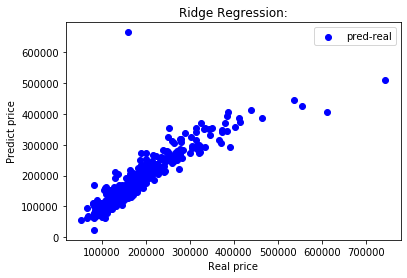

In [42]:
import matplotlib.pyplot as plt

plt.xlabel( 'Real price' )
plt.ylabel( 'Predict price' )
plt.title( 'Ridge Regression:' )
plt.scatter( y_testLabel, y_pred_ridge, color = 'blue', label = "pred-real" )
plt.legend()

plt.show()

### 6.比較將特徵值進行標準化前處理後之預測準確度

In [43]:
from sklearn.preprocessing import normalize, scale

label = rawData["SalePrice"]
data = rawData.drop( "SalePrice", axis = 1 )

data_normalized = pd.DataFrame( scale( data ) )
# data_normalized = pd.DataFrame( normalize( data.T ) ).T


xstd_trainData, xstd_testData, y_trainLabel, y_testLabel = train_test_split( data_normalized, label, test_size = 0.3, random_state = 0 )

In [44]:
# model : Linear Regression
linearReg = linear_model.LinearRegression().fit( xstd_trainData, y_trainLabel )
y_pred_linear = linearReg.predict( xstd_testData )

# calculate mean square error (MSE)
# linearMSE = np.sum((np.array(y_testLabel).flatten() - np.array(y_pred).flatten())**2)/len(y_testLabel)
linearMSE = mean_squared_error( y_testLabel, y_pred_linear )

print( "-------------------------------------------------------" )
print( "Linear MSE TEST :", linearMSE )
score = linearReg.score( xstd_testData, y_testLabel )
print( "score of Linear Regression :", score )

## ------------------------------------------------------------------------

# model : Linear Regression
ridgeReg = linear_model.Ridge( alpha = 1 ).fit( xstd_trainData, y_trainLabel )
y_pred_ridge = ridgeReg.predict( xstd_testData )

# calculate mean square error (MSE)
# ridgeMSE = np.sum((np.array(y_testLabel).flatten() - np.array(y_pred).flatten())**2)/len(y_testLabel)
ridgeMSE = mean_squared_error( y_testLabel, y_pred_ridge )

print( "-------------------------------------------------------" )
print( "Ridge MSE TEST :", ridgeMSE )
score = ridgeReg.score( xstd_testData, y_testLabel )
print( "score of Linear Regression :", score )

## ------------------------------------------------------------------------

# model : Linear Regression
lassoReg = linear_model.Lasso( alpha = 1.0, max_iter = 5000 ).fit( xstd_trainData, y_trainLabel )
y_pred_lasso = lassoReg.predict( xstd_testData )

# calculate mean square error (MSE)
# lassoMSE = np.sum((np.array(y_testLabel).flatten() - np.array(y_pred).flatten())**2)/len(y_testLabel)
lassoMSE = mean_squared_error( y_testLabel, y_pred_lasso )

print( "-------------------------------------------------------" )
print( "Lasso MSE TEST :", lassoMSE )
score = lassoReg.score( xstd_testData, y_testLabel )
print( "score of Lasso Regression :", score )

print( "-------------------------------------------------------" )
print( "Linear Regression( Standardization data ) is the best model!" )
print( "做標準化後，僅Linear Regression準確率微幅上升，Ridge、Lasso Regression皆微幅下降" )

-------------------------------------------------------
Linear MSE TEST : 1435996554.9480515
score of Linear Regression : 0.7884816076974839
-------------------------------------------------------
Ridge MSE TEST : 1437186931.2055817
score of Linear Regression : 0.7883062685078734
-------------------------------------------------------
Lasso MSE TEST : 1436357970.1237624
score of Lasso Regression : 0.7884283722237241
-------------------------------------------------------
Linear Regression( Standardization data ) is the best model!
做標準化後，僅Linear Regression準確率微幅上升，Ridge、Lasso Regression皆微幅下降


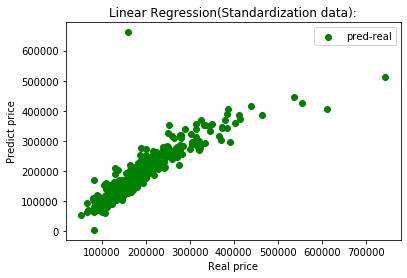

In [45]:
import matplotlib.pyplot as plt

plt.xlabel( 'Real price' )
plt.ylabel( 'Predict price' )
plt.title( 'Linear Regression(Standardization data):' )
plt.scatter( y_testLabel, y_pred_linear, color = 'green', label = "pred-real" )
plt.legend()

plt.show()

### 7.利用相關係數選取特徵使用：

#### 利用pandas 套件中dataframe 之函數corr()找出各特徵之間的相關係數，並利用seaborn 套件之heatmap()函數繪製。

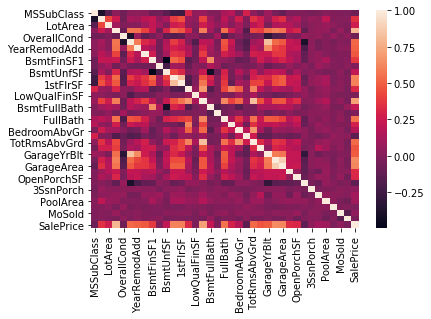

In [46]:
import seaborn as sns

corrMatrix = snsData.corr()
sns.heatmap(corrMatrix)
plt.show()

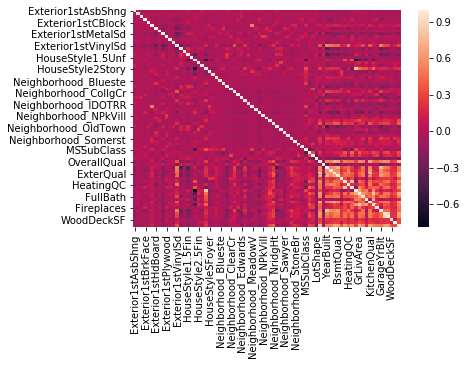

In [47]:
import seaborn as sns

# 有經過前處理的資料過多，導致圖上僅秀出部分資料，但仍會存於matrix中
corrMatrix = rawData.corr()
sns.heatmap(corrMatrix)
plt.show()

#### 僅使用與房價最相關的前四高係數之特徵進行預測

In [48]:
sortedCorr = corrMatrix.sort_values(by="SalePrice", ascending=False)
top4List = sortedCorr.index[1:5] # return a list
linearReg.fit( x_trainData[top4List], y_trainLabel)
top4Score = linearReg.score( x_testData[top4List], y_testLabel)

#### 僅使用與房價最相關的前四低係數之特徵進行預測

In [49]:
sortedCorr = corrMatrix.sort_values( by = "SalePrice", ascending = True )
least4List = sortedCorr.index[0:4] # return a list
linearReg.fit( x_trainData[least4List], y_trainLabel )
least4Score = linearReg.score( x_testData[least4List], y_testLabel )

#### 比較使用前四高、前四低及所有特徵三種狀況所得到預測準確度的差異

In [50]:
linearReg.fit( x_trainData, y_trainLabel)

originalScore = linearReg.score( x_testData, y_testLabel )
# print( x_testData )
print( "前四高  score: ", top4Score )
print( "前四低  score: ", least4Score )
print( "所有特徵score: ", originalScore )

前四高  score:  0.7157668186563448
前四低  score:  0.17316364603442003
所有特徵score:  0.7884754756157942


### 8.利用 matplotlib 套件繪製特徵 GrLivArea 與房價 SalePrice 之散佈(scatter plot)圖，判斷是否有極端之 outliners，請將之移除後再比較預測準備度。

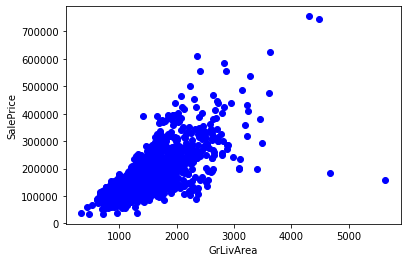

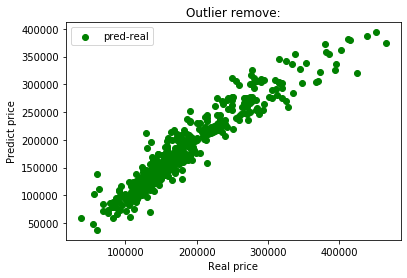

original score:  0.7884754756157942
score of outlier remove:  0.9036110693786399


In [51]:
figure = plt.figure()
price = plt.scatter( data["GrLivArea"], label, c = 'blue' )
plt.xlabel( "GrLivArea" )
plt.ylabel( "SalePrice" )
plt.show()
'''remove outlier'''

nonOutlierData = rawData.copy()
for index, row in rawData.iterrows():
    # print(index)
    # print(row)
    if row["GrLivArea"] > 3500 or row["SalePrice"] > 500000 :
        nonOutlierData = nonOutlierData.drop( index )
nonOutlierData = nonOutlierData.reset_index()
# it should reset index after dropping the row or the prediction will fail 

label = nonOutlierData["SalePrice"]
data = nonOutlierData.drop( "SalePrice", axis = 1 )

x_trainData, x_testData, y_trainLabel, y_testLabel = train_test_split( data, label, test_size = 0.3, random_state = 0 )   
# linearReg.fit( x_trainData, y_trainLabel )
linearReg = linear_model.LinearRegression().fit( x_trainData, y_trainLabel )
y_pred_linear = linearReg.predict( x_testData )
# print( y_pred_linear.astype( int ) )
# y_pred_linear = y_pred_linear.astype( int )
plt.xlabel( 'Real price' )
plt.ylabel( 'Predict price' )
plt.title( 'Outlier remove:' )
plt.scatter( y_testLabel, y_pred_linear, color = 'green', label = "pred-real" )
plt.legend()

plt.show()

print( "original score: ", originalScore )
print( "score of outlier remove: ", linearReg.score( x_testData, y_testLabel ) )



#### 透過去除掉過於極端的數值後，可以發現準確率提升了11.6%。